In [56]:
#System imports
import math, time

import matplotlib.pyplot as plt

import glob

#Helper imports
import numpy as np
import cv2

#Nice printout imports
from termcolor import colored

#TensorFlow
import tensorflow as tf
import keras
from keras import layers, regularizers

#Kaggle
import kagglehub

#Sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

#Pandas
import pandas as pd

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_visible_devices([], 'GPU')

############################################################################
############################################################################
def plotHistory(model, history):
    
    fig, axes = plt.subplots(1,3, figsize=(15,5), layout='tight')
    
    axes[0].plot(history.history['loss'], label = 'train')
    axes[0].plot(history.history['val_loss'], label = 'val')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss function')
    axes[0].legend(loc='upper right')
    
    axes[1].plot(history.history['loss'], label = 'train')
    axes[1].plot(history.history['val_loss'], label = 'val')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss function')
    axes[1].legend(loc='upper right')
    axes[1].set_yscale('log')

    ConfusionMatrixDisplay.from_predictions(labels, np.argmax(model.predict(features), axis=1), normalize="true", ax=axes[2], colorbar=False) 
############################################################################
############################################################################    

Num GPUs Available:  0


813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


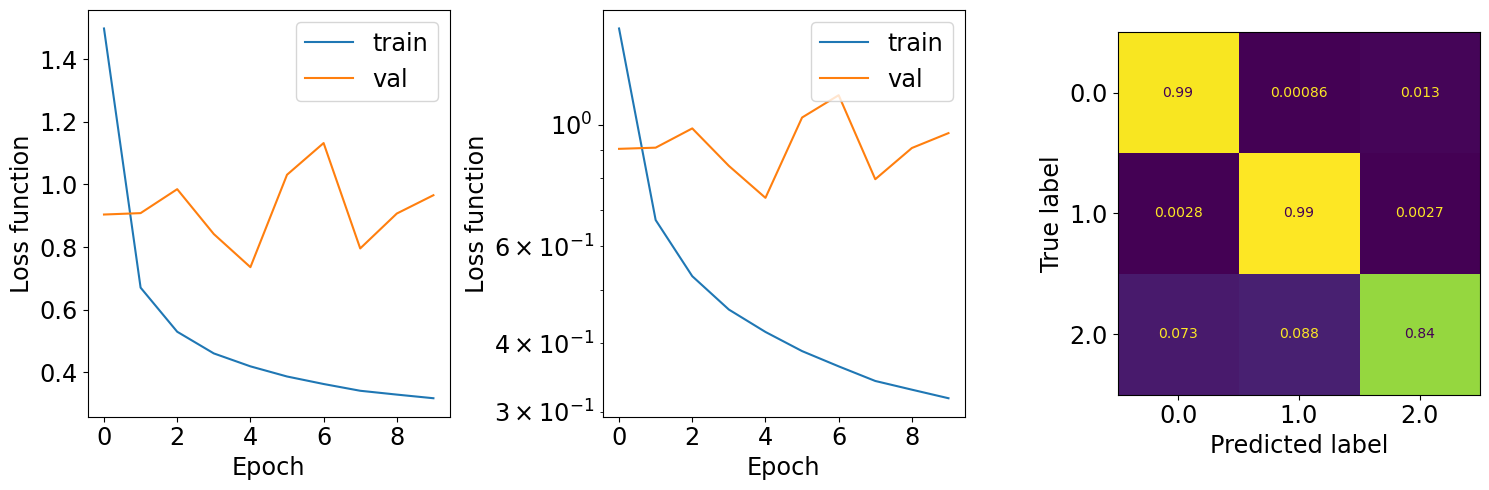

In [57]:
plotHistory(model, history)

In [2]:
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Wojtek_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Wojtek.gzip',compression='gzip') 

import glob
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Artur_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Artur.gzip',compression='gzip') 

In [3]:
df.describe()

,date,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
count,7000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2025-04-06 16:39:03.405537536,-4.332481,-0.297709,0.033629,-0.274299,-0.297917,-0.040312,-0.271651,-0.159304,0.492215,...,-0.083042,0.599914,-0.098853,-0.169386,0.158081,-0.132755,0.113380,0.106303,0.099978,-0.336944
min,2025-04-01 12:36:13.555427,-8.493450,-0.375000,-0.375000,-0.375000,-0.375000,-0.374998,-0.375000,-0.375000,-0.375000,...,-0.375000,-0.374486,-0.375000,-0.374999,-0.375000,-0.375000,-0.375000,-0.375000,-0.374995,-0.375000
25%,2025-04-01 12:54:32.881007360,-6.915896,-0.359545,-0.110399,-0.361727,-0.370732,-0.252086,-0.359601,-0.334802,0.114659,...,-0.305831,0.306041,-0.308509,-0.293359,-0.081907,-0.276712,-0.051414,-0.343685,-0.080294,-0.368083
50%,2025-04-01 13:17:11.184692480,-6.314390,-0.321898,0.026264,-0.327366,-0.355825,-0.119066,-0.321210,-0.232778,0.515307,...,-0.232530,0.558090,-0.151786,-0.192838,0.193749,-0.179403,0.103449,-0.223350,0.077114,-0.352106
75%,2025-04-02 21:26:17.728393216,-2.783419,-0.263133,0.170181,-0.238312,-0.293826,0.084902,-0.237920,-0.060744,0.856650,...,-0.069781,0.831348,0.014844,0.000000,0.374007,-0.009979,0.249337,0.327140,0.252340,-0.324252
max,2025-05-02 15:36:36.628555,9.070258,0.598409,1.606076,0.659764,1.268398,1.287135,0.992465,1.879233,2.000997,...,2.033676,3.642326,0.984098,-0.000000,1.978871,0.699664,2.770506,3.990021,1.806138,0.324673
std,NaN,3.817036,0.085489,0.211281,0.121422,0.133092,0.292082,0.129686,0.231246,0.476975,...,0.369696,0.515704,0.247237,0.137971,0.327871,0.179662,0.240094,0.654796,0.258150,0.048567


In [110]:
file_path = 'df.parquet_Wojtek.gzip'
df_W = pd.read_parquet(file_path)

file_path = 'df.parquet_Artur.gzip'
df_A = pd.read_parquet(file_path)

file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Monika.gzip'
df_test = pd.read_parquet(file_path)

features_W = np.asarray(df_W.drop(columns=['date','label']))
features_A = np.asarray(df_A.drop(columns=['date','label']))
features_test = np.asarray(df_test.drop(columns=['date','label']))

labels_A = np.full((len(features_A),1), 0.0)
labels_W = np.full((len(features_W),1), 1.0)
labels_M = np.full((len(features_test),1), 2.0)
labels_test = np.full((len(features_test),1), 3.0)


#weighted images are away from original images
scale = 0.8
offset = (1 - scale)/2

weights = np.random.default_rng().random(features_A.shape)*scale + offset

features_X = (weights*features_A + (1-weights)*features_W[:len(features_A)])
labels_X = np.full((len(features_X),1), 2.0)

labels = np.concatenate( (labels_A, labels_W, labels_X) )
features = np.concatenate( (features_A, features_W, features_X) )

features, labels = shuffle(features, labels, random_state=0)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_15                │ (None, 1280)           │         2,561 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,764 (178.77 KB)

 Trainable params: 43,203 (168.76 KB)

 Non-trainable params: 2,561 (10.01 KB)

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0200 - sparse_categorical_accuracy: 0.9995 


[0.02067020907998085, 0.9992307424545288]

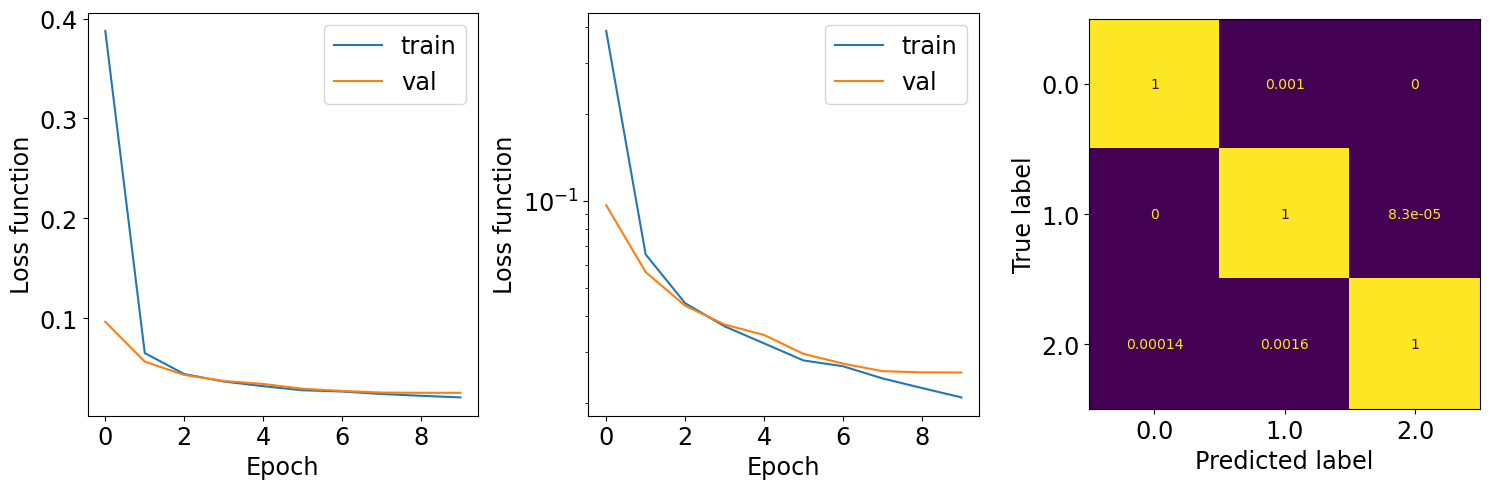

In [117]:
model = keras.Sequential(
    [
        layers.Input(shape=(features.shape[1],)),
        tf.keras.layers.Normalization(axis=-1),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(3, activation="softmax", kernel_regularizer=None),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.summary()

history = model.fit(
    features,
    labels,
    batch_size=64,
    epochs=10,
    shuffle=True,
    validation_split = 0.1,
    #class_weight = {0:1.0,1:1.0,2:1.0},
    verbose=0
)

plotHistory(model, history)

model.save(filepath="./model_A_vs_W.keras")
model.evaluate(features, labels, batch_size=128)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


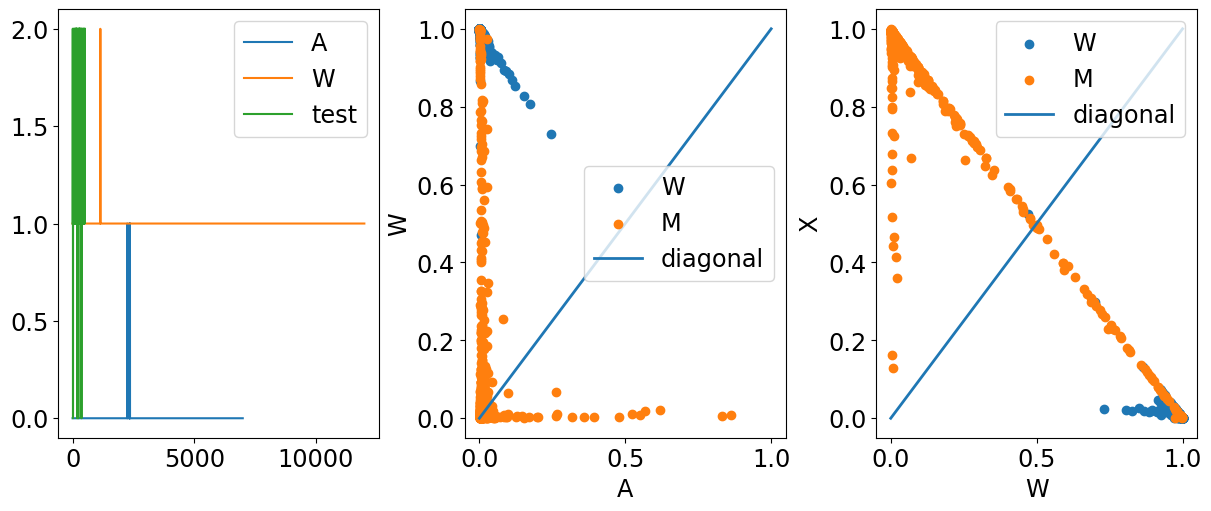

In [118]:
model = keras.saving.load_model("model_A_vs_W.keras")

feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[model.layers[-2].output],
)

response_A = np.argmax(model.predict(features_A), axis=1)
response_W =  np.argmax(model.predict(features_W), axis=1)
response_test =  np.argmax(model.predict(features_test), axis=1)

features_2D_A = model.predict(features_A)
features_2D_W = model.predict(features_W)
features_2D_test = model.predict(features_test)

fig, axes = plt.subplots(1,3,layout='constrained', figsize = (12,5))

axes[0].plot(response_A[:], label="A")
axes[0].plot(response_W[:], label="W")
axes[0].plot(response_test[:], label="test")
axes[0].legend();

axes[1].scatter(features_2D_W[:,0], features_2D_W[:,1], label="W")
axes[1].scatter(features_2D_test[:,0], features_2D_test[:,1], label="M")
axes[1].plot([0,1], [0,1], lw=2, label="diagonal")
axes[1].set_xlabel('A')
axes[1].set_ylabel('W')
axes[1].legend();

axes[2].scatter(features_2D_W[:,1], features_2D_W[:,2], label="W")
axes[2].scatter(features_2D_test[:,1], features_2D_test[:,2], label="M")
axes[2].plot([0,1], [0,1], lw=2, label="diagonal")
axes[2].set_xlabel('W')
axes[2].set_ylabel('X')
axes[2].legend();

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


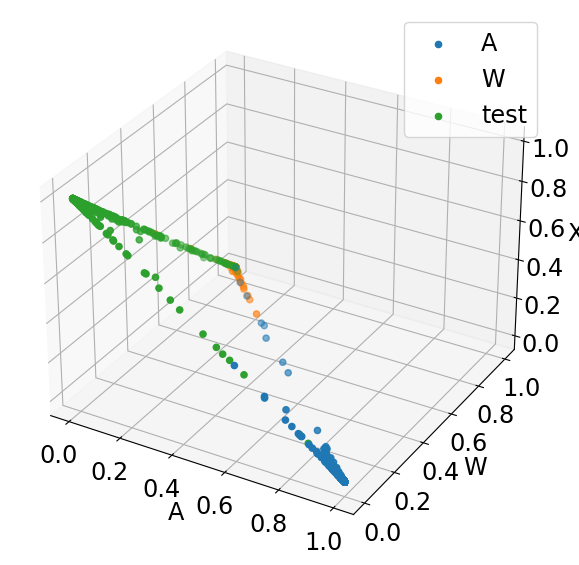

In [119]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
response = model.predict(features_A)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "A")
response = model.predict(features_W)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "W")
response = model.predict(features_test)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "test")
ax.legend()

ax.set_xlabel('A')
ax.set_ylabel('W')
ax.set_zlabel('X');

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(100, 1280))
  warnings.warn(msg)
/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1000, 1280))
  warnings.warn(msg)


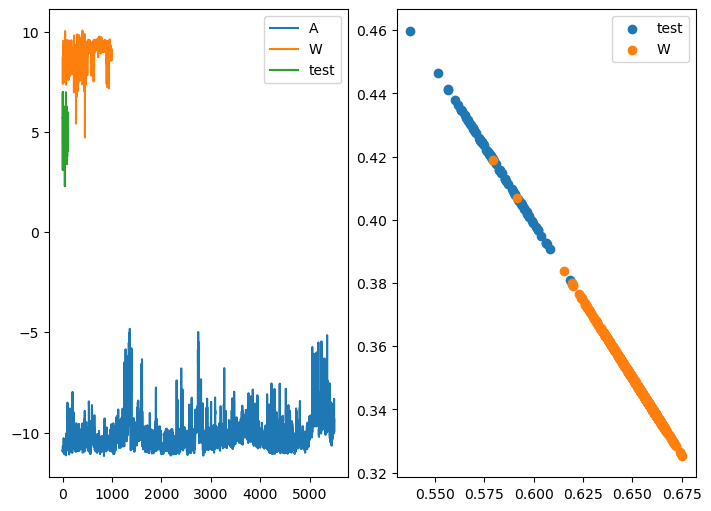

In [8]:
file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Marcin.gzip'

df_test = pd.read_parquet(file_path)
df_test.drop(index=0, inplace=True)
features_test = np.asarray(df_test.drop(columns=['date','label']))

model = keras.saving.load_model("model_A_vs_W.keras")

response_A = model.predict(features_A)
response_W = model.predict(features_W)
response_test = model.predict(features_test)

features_2D_test = feature_extractor(features_test)
features_2D_W = feature_extractor(features_W)

fig, axes = plt.subplots(1,2,layout='constrained', figsize = (7,5))

axes[0].plot(response_A, label="A")
axes[0].plot(response_W, label="W")
axes[0].plot(response_test, label="test")
axes[0].legend();

axes[1].scatter(features_2D_test[:,0], features_2D_test[:,1], label="test")
axes[1].scatter(features_2D_W[:,0], features_2D_W[:,1], label="W")
axes[1].legend();